In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("Snp 500 Daily 1928.csv")

In [108]:
date=list(df["Date"])

pri_o=list(df["Open"])
pri_c=list(df["Close"])

yr=range(1928,2021,1)

# Biggest Down & Biggest Up Days

In [109]:
pr=np.array(pri_c)
prt=(pr[1:]-pr[0:-1])/pr[0:-1]*100

x=dict(zip(date[1:],prt))

import operator
s1=sorted(x.items(), key=operator.itemgetter(1))
down=pd.DataFrame(s1[0:40])

s2=sorted(x.items(), key=operator.itemgetter(1), reverse=True)
up=pd.DataFrame(s2[0:40])

# Calculate Number of Days

In [110]:
ytr=1928
k=0

ar=list()

for i in range(len(date)):
    tmp=int(date[i][0:4])
    
    if tmp == ytr:
        k+=1
    else:
        k+=1
    
        ar.append(k)
        ytr+=1
            
        k=0

In [5]:
nar=list()

for i in range(len(ar)+1):
    nar.append(sum(ar[0:i]))

# Extract data for each year

In [6]:
for i in range(len(ar)+1):
    
    if i == len(ar):
        ijk=int(nar[i])

    else:
        
        ix1=int(nar[i])
        ix2=int(nar[i+1])

In [7]:
for i in range(len(ar)+1):
    dp_o='pri_o'+str(1928+i)
    dp_c='pri_c'+str(1928+i)
    dt='date'+str(1928+i)
    
    if i == len(ar):
        ix=int(nar[i])
        globals()[dp_o]=pri_o[ix-1:]
        globals()[dp_c]=pri_c[ix-1:]
        globals()[dt]=date[ix-1:]
        
        
    else:
        
        ix1=int(nar[i])
        ix2=int(nar[i+1])
        globals()[dp_o]=pri_o[ix1:ix2-1]#date[0:250]
        globals()[dp_c]=pri_c[ix1:ix2-1]
        globals()[dt]=date[ix1:ix2-1]
        


In [8]:
for i in range(1929,2020):
    n1='pri_c'+str(i)
    n2='date'+str(i)

In [9]:
st=2015
fi=2017

for i in range(st,fi+1):
    
    var='date'+str(i)
    vari='pri_c'+str(i)

    if i==st:        
        tmp=np.array(globals()[vari])
        dtmp=np.array(globals()[var])
        
    elif i == st+1:
        tm=np.array(globals()[vari])
        dtm=np.array(globals()[var])
        
        x=np.hstack([dtmp,dtm])
        y=np.hstack([tmp,tm])
    else:
        x=np.hstack([x,globals()[var]])
        y=np.hstack([y,globals()[vari]])
        

In [10]:
for i in range(1929,2021):
    
    na1='pri_c'+str(i)
    na2='pri_c'+str(i-1)
    globals()[na1].insert(0,globals()[na2][-1])

In [11]:
for i in range(1929,2021):
    na1='pri_c'+str(i)
    globals()[na1]=np.array(globals()[na1])
    

#dpr=dpr[:]

### One Year

In [158]:
p=5

ti=[]
pr1=[]
pr2=[]

for yr in range(1930,2021):
#yr=2015

    na=globals()['pri_c'+str(yr)]
    na=np.array(na)
    da=globals()['date'+str(yr)]

    dpr=(na[1:]-na[:-1])/na[:-1]

    dpr.sort()
    
    #tdpr=dpr[:-p]
    tdpr=dpr[p:]
    
    x0=1.0
    x=x0
    y=x0
    
    for per in tdpr:
        x=x*(1.+per)

    tr= ((x/x0)-1. )*100 
    pr1.append(tr)
    #tr1=(1+tr/100.)**(1./(fi-st+1))-1.

    for per in dpr:

        y=y*(1.+per)

    r= ((y/x0)-1. )*100 
    #r1=(1+r/100.)**(1./(fi-st+1))-1.
    pr2.append(r)
    #print(yr, ' - ', str(p)+' Days %15.2f  \t All days %15.2f' % (tr,r) )
    ti.append(yr)

91


<BarContainer object of 91 artists>

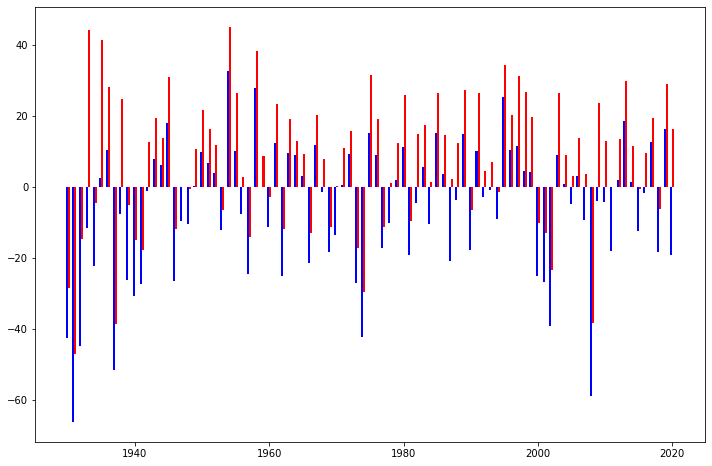

In [82]:
ti=np.array(ti)
print(len(ti))

st=0
fi=99

plt.figure(figsize=(12,8))
plt.bar(ti[st:fi]-0.15,pr1[st:fi],width=0.3, color='b', align='center')
plt.bar(ti[st:fi]+0.15,pr2[st:fi],width=0.3, color='r', align='center')

### 2 or More Years

In [84]:
st=1931
fi=2020

for i in range(st,fi+1):
    
    na=globals()['pri_c'+str(i)]
    na=np.array(na)
    
    nd=globals()['date'+str(i)]
    nd=np.array(nd)
    
    if i == st:
        dpr=(na[1:]-na[:-1])/na[:-1]
        
        da=nd

    else:
        tdpr=(na[1:]-na[:-1])/na[:-1]

        tnd=np.array(nd)

        
        dpr=np.hstack([dpr,tdpr])
        da=np.hstack([da,tnd])              
        

In [85]:
vp=dict(zip(da,dpr))

def f2(x):
    return x[1]

res= sorted(vp.items(), key=f2)

dat=[]
ddpr=[]

for i in range(len(res)):
        dat.append(res[i][0])
        ddpr.append(res[i][1])
        
dat=np.array(dat)
ddpr=np.array(ddpr)

In [92]:
days=(fi-st+1)*1

print(days)

ydat=dat[:-days]
ydpr=ddpr[:-days]

#ydat=dat[days:]
#ydpr=ddpr[days:]

90


In [93]:
x0=1.0
x=x0

for per in ydpr:
    x=x*(1.+per)

r= ((x/x0)-1. )*100 
r1=(1+r/100.)**(1./(fi-st+1))-1.

print( r,  r1*100)

-33.92637774831763 -0.4593866622750853


# KOSPI

In [205]:
df=pd.read_excel("KOSPI 1988.xls")

In [206]:
date=df["일자"]
pric=df["현재지수"]

price=[]

for i in range(len(pric)):
    price.append( float(pric[i].replace(',','')) )
    


In [207]:
ytr=1988
k=0

ar=list()

for i in range(len(date)):
    tmp=int(date[i][0:4])
    
    if tmp == ytr:
        k+=1
    else:
        k+=1
    
        ar.append(k)
        ytr+=1
            
        k=0

In [208]:
nar=list()

for i in range(len(ar)+1):
    nar.append(sum(ar[0:i]))

In [209]:
for i in range(len(ar)+1):
    dp_o='price'+str(1988+i)
    dt='date'+str(1988+i)
    
    if i == len(ar):
        ix=int(nar[i])
        globals()[dp_o]=price[ix-1:]
        globals()[dt]=date[ix-1:]
        
    else:
        
        ix1=int(nar[i])
        ix2=int(nar[i+1])
        globals()[dp_o]=price[ix1:ix2-1]#date[0:250]
        globals()[dt]=date[ix1:ix2-1]
    

# One Year

In [210]:
yr=2015

da=globals()["date"+str(yr)]
dpr=globals()["price"+str(yr)]

vp=dict(zip(da,dpr))

def f2(x):
    return x[1]

res= sorted(vp.items(), key=f2)

dat=[]
ddpr=[]

for i in range(len(res)):
        dat.append(res[i][0])
        ddpr.append(res[i][1])
        
dat=np.array(dat)
ddpr=np.array(ddpr)

In [211]:
pdat=dat[1:]
dpr=(ddpr[1:]-ddpr[:-1])/ddpr[:-1]*100

## One Each Year

In [221]:
p=5

ti=[]
pr1=[]
pr2=[]

for yr in range(1988,2021):
#yr=2015

    na=globals()['price'+str(yr)]
    na=np.array(na)
    da=globals()['date'+str(yr)]
    da=da[1:]
    
    dpr=(na[1:]-na[:-1])/na[:-1]
    dpr.sort()
    
    tdpr=dpr[:]
    #tdpr=dpr[p:]
    
    x0=1.0
    x=x0
    y=x0
    
    for per in tdpr:
        x=x*(1.+per)

    tr= ((x/x0)-1. )*100 
    pr1.append(tr)
    #tr1=(1+tr/100.)**(1./(fi-st+1))-1.

    for per in dpr:

        y=y*(1.+per)

    r= ((y/x0)-1. )*100 
    #r1=(1+r/100.)**(1./(fi-st+1))-1.
    pr2.append(r)
    ti.append(yr)
    
    print(yr, ' - ', str(p)+' Days %15.2f  \t All days %15.2f' % (tr,r) )
    

1988  -  5 Days           70.51  	 All days           70.51
1989  -  5 Days           -0.85  	 All days           -0.85
1990  -  5 Days          -25.05  	 All days          -25.05
1991  -  5 Days          -12.43  	 All days          -12.43
1992  -  5 Days            4.33  	 All days            4.33
1993  -  5 Days           25.39  	 All days           25.39
1994  -  5 Days           17.11  	 All days           17.11
1995  -  5 Days          -11.44  	 All days          -11.44
1996  -  5 Days          -24.27  	 All days          -24.27
1997  -  5 Days          -41.51  	 All days          -41.51
1998  -  5 Days           41.86  	 All days           41.86
1999  -  5 Days           71.76  	 All days           71.76
2000  -  5 Days          -48.84  	 All days          -48.84
2001  -  5 Days           33.04  	 All days           33.04
2002  -  5 Days          -13.76  	 All days          -13.76
2003  -  5 Days           22.63  	 All days           22.63
2004  -  5 Days            8.71  	 All d

## More than 2 years

In [188]:
st=1988
fi=2020

for i in range(st,fi+1):
    
    na=globals()['price'+str(i)]
    na=np.array(na)
    
    nd=globals()['date'+str(i)]
    nd=np.array(nd[1:])
    
    if i == st:
        dpr=(na[1:]-na[:-1])/na[:-1]
        
        da=nd

    else:
        tdpr=(na[1:]-na[:-1])/na[:-1]

        tnd=np.array(nd)
    
        dpr=np.hstack([dpr,tdpr])
        da=np.hstack([da,tnd])              
        

In [190]:
vp=dict(zip(da,dpr))

def f2(x):
    return x[1]

res= sorted(vp.items(), key=f2)

dat=[]
ddpr=[]

for i in range(len(res)):
        dat.append(res[i][0])
        ddpr.append(res[i][1])
        
dat=np.array(dat)
ddpr=np.array(ddpr)

In [191]:
dat

array(['2001/09/12', '2000/04/17', '2008/10/24', ..., '1998/06/17',
       '2020/03/24', '2008/10/30'], dtype='<U10')

In [195]:
print(dat[0:20], '\n',ddpr[0:20]*100)
print(dat[-20:], '\n', ddpr[-20:]*100)

['2001/09/12' '2000/04/17' '2008/10/24' '2008/10/16' '2020/03/19'
 '1998/06/12' '2000/09/18' '2008/11/06' '1997/12/23' '2008/10/23'
 '1999/07/23' '2000/09/22' '1997/11/24' '2002/06/26' '1997/12/12'
 '2007/08/16' '1997/11/07' '1998/05/25' '2000/10/17' '2008/11/20'] 
 [-12.01879498 -11.63330794 -10.57053853  -9.43832632  -8.39366516
  -8.09552784  -8.06112703  -7.55649598  -7.49886381  -7.48111653
  -7.34134704  -7.17126126  -7.16684177  -7.15022754  -7.07263428
  -6.92616165  -6.90414718  -6.78275523  -6.77149609  -6.70030094]
['1998/01/19' '2000/08/09' '2000/11/01' '1997/12/26' '1997/12/05'
 '1997/12/04' '2001/01/04' '1998/06/18' '1997/12/15' '2020/03/20'
 '1998/10/09' '2008/12/08' '2002/02/14' '1998/01/30' '1998/12/21'
 '1998/12/10' '2000/03/02' '1998/06/17' '2020/03/24' '2008/10/30'] 
 [ 6.62620234  6.62833293  6.66303841  6.74349125  6.97617111  6.98636999
  7.01724105  7.13603897  7.22027681  7.44422491  7.45036367  7.48154416
  7.64134873  7.65270708  7.70124798  7.80407202  8.001